# Corpus Reduction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'figure.figsize':(8,6), 'figure.dpi':150})

## load original corpus

In [2]:
df = pd.read_csv("../data/ocorpus.csv")

In [3]:
df.head()

,filename,author,title,year,textlength,text
0,Wilhelm_Walloth_-_Das_Schatzhaus_des_Königs_(1...,Wilhelm Walloth,Das Schatzhaus des Königs,1883,105651,Roman aus dem alten Ägypten Und die Ägypter zw...
1,Theodor_Däubler_-_L'Africana_(1928),Theodor Däubler,LAfricana,1928,43258,"L'Africana Roman Horen-Verlag , Berlin-Grunewa..."
2,Max_Eyth_-_Der_Schneider_von_Ulm_(1906),Max Eyth,Der Schneider von Ulm,1906,272961,"[ cover ] Historischer Roman um den Mann , der..."
3,Novalis_-_Die_Lehrlinge_zu_Sais_(1799),Novalis,Die Lehrlinge zu Sais,1799,12391,1798- 1 . Der Lehrling Mannigfache Wege gehen ...
4,Christoph_Martin_Wieland_-_Agathodämon_(1799),Christoph Martin Wieland,Agathodämon,1799,96572,"In sieben Büchern ( ) Est Deus in nobis , agit..."


## Check if the corpus contains duplicates

In [4]:
df.shape

(2735, 6)

In [5]:
df = df.drop_duplicates()
df.shape

(2735, 6)

## Check if Corpus does have rows with NaNs

In [6]:
nan_df = df[df.isna().any(axis=1)]
print(f"Corpus does have {nan_df.shape[0]} rows with NaN.")

Corpus does have 0 rows with NaN.


# Reduction tests

### Figure: Publication year histogram

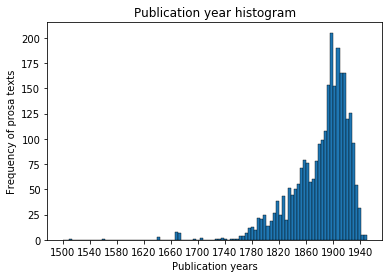

In [7]:
plt.hist(df["year"], 
         histtype="bar",
         color="#1f77b4",
         edgecolor="black",
         linewidth=0.4,
         bins=100, 
         range=[1500,1950])
plt.gca().set(title='Publication year histogram',
              xlabel='Publication years',
              ylabel='Frequency of prosa texts')
plt.xticks(np.arange(1500, 1950, 40))
plt.savefig('../data/figures/all_publication_years.png',
            dpi=300,
            bbox_inches='tight')
plt.show()

### Reduce corpus by selection text between 1840 and 1930

In [8]:
criteria = (df["year"] >= 1840) & (df["year"] <= 1930)
rdf = df[criteria]
rdf.head()

,filename,author,title,year,textlength,text
0,Wilhelm_Walloth_-_Das_Schatzhaus_des_Königs_(1...,Wilhelm Walloth,Das Schatzhaus des Königs,1883,105651,Roman aus dem alten Ägypten Und die Ägypter zw...
1,Theodor_Däubler_-_L'Africana_(1928),Theodor Däubler,LAfricana,1928,43258,"L'Africana Roman Horen-Verlag , Berlin-Grunewa..."
2,Max_Eyth_-_Der_Schneider_von_Ulm_(1906),Max Eyth,Der Schneider von Ulm,1906,272961,"[ cover ] Historischer Roman um den Mann , der..."
5,Friedrich_Spielhagen_-_Platt_Land_(1878),Friedrich Spielhagen,Platt Land,1878,205088,"Erstes Buch Erstes Kapitel . Der Wagen hielt ,..."
6,Adalbert_Stifter_-_Ein_Gang_durch_die_Katakomb...,Adalbert Stifter,Ein Gang durch die Katakomben,1844,6351,"Wir sind so gewohnt worden , unsere Voreltern ..."


In [9]:
rdf.shape

(2212, 6)

In [10]:
1 - 2212/2735

0.19122486288848262

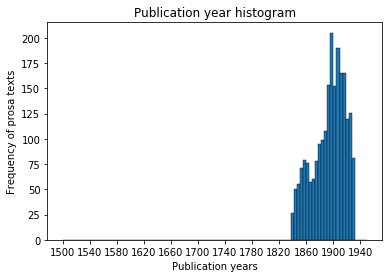

In [11]:
plt.hist(rdf["year"], 
         histtype="bar",
         color="#1f77b4",
         edgecolor="black",
         linewidth=0.4,
         bins=100, 
         range=[1500,1950])
plt.gca().set(title='Publication year histogram',
              xlabel='Publication years',
              ylabel='Frequency of prosa texts')
plt.xticks(np.arange(1500, 1950, 40))
plt.savefig('../data/figures/reduced_publication_years.png',
            dpi=300,
            bbox_inches='tight')
plt.show()

### Reduce corpus by critical texts

1. Duplicate: Knigge's "Benjamin Noldmann's Geschichte der Aufklärung in Abyssinien" is contained twice (additional occurrence as part of "Traum des Herrn Brick").

In [12]:
rdf[rdf["author"].str.contains("Adolph Freiherr")]

,filename,author,title,year,textlength,text


2. Duplicate: E.T.A. Hoffmann's "Meister Martin der Küfner und seine Gesellen" is already contained in "Serapions-Brüdern".

In [13]:
rdf[rdf["author"].str.contains("Hoffmann")]

,filename,author,title,year,textlength,text
2252,Hans_Hoffmann_-_Im_Lande_der_Phäaken_(1884),Hans Hoffmann,Im Lande der Phäaken,1884,51169,. Novellen von Hans Hoffmann . Berlin . Verlag...
2486,Hans_Hoffmann_-_Das_Gymnasium_zu_Stolpenburg_(...,Hans Hoffmann,Das Gymnasium zu Stolpenburg,1891,56764,. Novellen von Hans Hoffmann . Zweite Auflage ...


3. Semi-Duplicate: Gottfried Keller's "Der Grüne Heinrich" is contained in two versions. They are, in fact, different, but there's a whole lot of identical passages, too. Depending on your type of research question, this could cause an unevenness.

In [14]:
rdf[rdf["title"].str.contains("grüne Heinrich")]

,filename,author,title,year,textlength,text
1156,Gottfried_Keller_-_Der_grüne_Heinrich._Erste_F...,Gottfried Keller,Der grüne Heinrich Erste Fassung,1854,305052,Der grüne Heinrich . Erste Fassung Vorwort Von...
1893,Gottfried_Keller_-_Der_grüne_Heinrich_(1879),Gottfried Keller,Der grüne Heinrich,1879,288074,Zweite Fassung ( /80 ) Inhalt : • Erster Teil ...


#### Remove "Der grüne Heinrich Erste Fassung"

In [15]:
rdf2 = rdf[rdf["title"] != "Der grüne Heinrich Erste Fassung"] 

In [16]:
rdf2[rdf2["title"].str.contains("grüne Heinrich")]

,filename,author,title,year,textlength,text
1893,Gottfried_Keller_-_Der_grüne_Heinrich_(1879),Gottfried Keller,Der grüne Heinrich,1879,288074,Zweite Fassung ( /80 ) Inhalt : • Erster Teil ...


4. Duplicate: Löns's "Dahinten in der Heide" is contained again in the collection "Aus Forst und Flur".

In [17]:
rdf2[rdf2["title"].str.contains("Dahinten in")]

,filename,author,title,year,textlength,text
1524,Hermann_Löns_-_Dahinten_in_der_Heide_(1909),Hermann Löns,Dahinten in der Heide,1909,40678,Roman Inhalt : Der Ortolan Der Goldammer Der T...


#### Remove "Dahinten in der Heide"

In [18]:
rdf2 = rdf2[rdf2["title"] != "Dahinten in der Heide"] 
rdf2.shape

(2210, 6)

5. Duplicate: Löns's "Der letzte Hansbur", "Das zweite Gesicht", "Die Häuser von Ohlenhof" appear again as part of "Sämtl. Werke Teil 7".

In [19]:
rdf2[rdf2["title"].str.contains("Sämtliche Werke")]

,filename,author,title,year,textlength,text
475,Hermann_Löns_-_Sämtliche_Werke_-_Band_7_(1909),Hermann Löns,Sämtliche Werke - Band 7,1909,185357,"Gesammelte Werke , Band 7 Inhalt Der letzte Ha..."


#### Remove "Sämtliche Werke - Band 7"

In [20]:
rdf2 = rdf2[rdf2["title"] != "Sämtliche Werke - Band 7"]
rdf2.shape

(2209, 6)

6. Non-German Original: Strindberg's "Beichte eines Toren" is not a German original.

In [21]:
rdf2[rdf2["title"].str.contains("Die Beichte eines Thoren")]

,filename,author,title,year,textlength,text
2053,August_Strindberg_-_Die_Beichte_eines_Thoren_(...,August Strindberg,Die Beichte eines Thoren,1895,93173,"Roman 2 . Auflage . Budapest , 1894 . Carl Gri..."


#### Remove "Die Beichte eines Thoren"

In [22]:
rdf2 = rdf2[rdf2["title"] != "Die Beichte eines Thoren"]
rdf2.shape

(2208, 6)

Folgende Kritipunkte sind egal:
- Non-Fiction: Heinrich Heine's "Geständnisse" and his "Reisebilder" would have to be regarded as non-fictional.
- Non-Fiction: Seume's "Spaziergang nach Syrakus" is non-fictional.

## Plot length of texts

### Abb. TODO - Textlängen Histogramm vor der "Normalisierung"

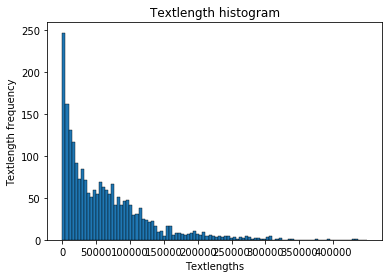

In [23]:
plt.hist(rdf2["textlength"], 
         histtype="bar",
         color="#1f77b4",
         edgecolor="black",
         linewidth=0.4,
         bins=100, 
         range=[0, 450000])
plt.gca().set(title='Textlength histogram',
              xlabel="Textlengths",
              ylabel='Textlength frequency')
plt.xticks(np.arange(0, 450000, 50000))
plt.savefig('../data/figures/textlength_before.png',
            dpi=300,
            bbox_inches='tight')
plt.show()

rechtsschiefe Verteilung (engl.: right-skewed distribution)

#### TODO: hier weiter, texte normalisieren

In [24]:
#Mittelwert
mean = np.mean(rdf2["textlength"])
mean

63870.64311594203

In [25]:
ndf = rdf2[rdf2["textlength"] > mean]
ndf.shape

(866, 6)

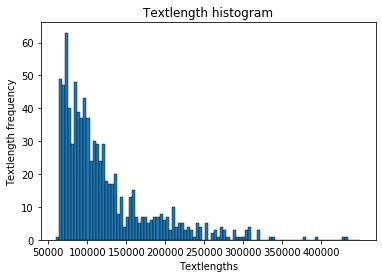

In [26]:
plt.hist(ndf["textlength"], 
         histtype="bar",
         color="#1f77b4",
         edgecolor="black",
         linewidth=0.4,
         bins=100, 
         range=[60000, 450000])
plt.gca().set(title='Textlength histogram',
              xlabel="Textlengths",
              ylabel='Textlength frequency')
plt.xticks(np.arange(50000, 450000, 50000))
plt.savefig('../data/figures/textlength_after.png',
            dpi=300,
            bbox_inches='tight')
plt.show()

In [27]:
#ndf.to_csv("../data/rcorpus.csv", index=False)

## Entferne Autoren mit nur einem Werk

In [69]:
nndf = ndf.groupby("author").filter(lambda x: len(x) > 2)

In [70]:
nndf.shape

(632, 6)

In [71]:
value_counts = nndf["author"].value_counts()
value_counts

Karl May                 32
Rudolph Stratz           18
Robert Kraft             18
Wilhelm Raabe            17
Joseph von Lauff         16
                         ..
Fritz Mauthner            3
Gregor Samarow            3
Otto Julius Bierbaum      3
Eduard von Keyserling     3
Lena Christ               3
Name: author, Length: 100, dtype: int64

In [72]:
#nndf.to_csv("../data/rcorpus.csv", index=False)

## 

In [2]:
nndf = pd.read_csv("../data/rcorpus.csv")

In [3]:
nndf.head()

,filename,author,title,year,textlength,text
0,Max_Eyth_-_Der_Schneider_von_Ulm_(1906),Max Eyth,Der Schneider von Ulm,1906,272961,"[ cover ] Historischer Roman um den Mann , der..."
1,Friedrich_Spielhagen_-_Platt_Land_(1878),Friedrich Spielhagen,Platt Land,1878,205088,"Erstes Buch Erstes Kapitel . Der Wagen hielt ,..."
2,Jakob_Christoph_Heer_-_Der_Wetterwart_(1905),Jakob Christoph Heer,Der Wetterwart,1905,120934,1925 I Die feierliche Abendhelle steht über de...
3,Robert_Kraft_-_Detektiv_Nobody's_Erlebnisse_un...,Robert Kraft,Detektiv Nobodys Erlebnisse und Reiseabenteuer...,1904,203192,. Detektiv Nobody 's Erlebnisse und Reiseabent...
4,Johannes_Richard_zur_Megede_-_Der_Ueberkater_-...,Johannes Richard zur Megede,Der Ueberkater - Band 1,1904,107779,Johann Richard zur Megede Der Ueberkater Erste...
